In [1]:
from PublicDataReader import Kbland
api = Kbland()
params = {
    "월간주간구분코드": "01",
    "매물종별구분": "01",
    "매매전세코드": "02",
    "지역코드": "11",
    # "기간": "1",
}
df = api.get_price_index(**params)
df

,월간주간구분,매물종별구분,거래구분,지역코드,지역명,날짜,가격지수
0,월간,아파트,전세,1100000000,서울,1986-01-01,7.755721
1,월간,아파트,전세,1100000000,서울,1986-02-01,8.083758
2,월간,아파트,전세,1100000000,서울,1986-03-01,8.364932
3,월간,아파트,전세,1100000000,서울,1986-04-01,8.552382
4,월간,아파트,전세,1100000000,서울,1986-05-01,8.622675
...,...,...,...,...,...,...,...
12319,월간,아파트,전세,1174000000,강동구,2025-02-01,90.198984
12320,월간,아파트,전세,1174000000,강동구,2025-03-01,90.461245
12321,월간,아파트,전세,1174000000,강동구,2025-04-01,91.168056
12322,월간,아파트,전세,1174000000,강동구,2025-05-01,91.554405


In [2]:
df.지역명.unique()

array(['서울', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구',
       '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'],
      dtype=object)

In [3]:
params = {
    "메뉴코드": "03",
    "월간주간구분코드": "01",
    "지역코드": "11",
    # "기간": "1",
}
df = api.get_market_trend(**params)
df[df["지역명"] == "서울"]

,메뉴코드,월간주간구분,지역코드,지역명,날짜,공급충분,공급적절,공급부족,전세수급지수
306,전세수급지수,월간,1100000000,서울,2000-01-01,5.509356,13.513514,80.977131,175.467775
307,전세수급지수,월간,1100000000,서울,2000-02-01,1.501502,4.504505,93.993994,192.492492
308,전세수급지수,월간,1100000000,서울,2000-03-01,0.799201,4.595405,94.605395,193.806194
309,전세수급지수,월간,1100000000,서울,2000-04-01,0.800000,5.300000,93.900000,193.100000
310,전세수급지수,월간,1100000000,서울,2000-05-01,3.096903,12.987013,83.916084,180.819181
...,...,...,...,...,...,...,...,...,...
607,전세수급지수,월간,1100000000,서울,2025-02-01,12.143364,43.502300,44.354336,132.210972
608,전세수급지수,월간,1100000000,서울,2025-03-01,9.831535,42.363486,47.804979,137.973443
609,전세수급지수,월간,1100000000,서울,2025-04-01,11.090973,41.437135,47.471892,136.380919
610,전세수급지수,월간,1100000000,서울,2025-05-01,9.168731,42.121899,48.709370,139.540639


현재 사용 중인 폰트: ['AppleGothic']


/var/folders/dn/4bm4cvd531x1j7rd69rfnr3m0000gn/T/ipykernel_94799/742912038.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_data['연도'] = seoul_data['날짜'].dt.year


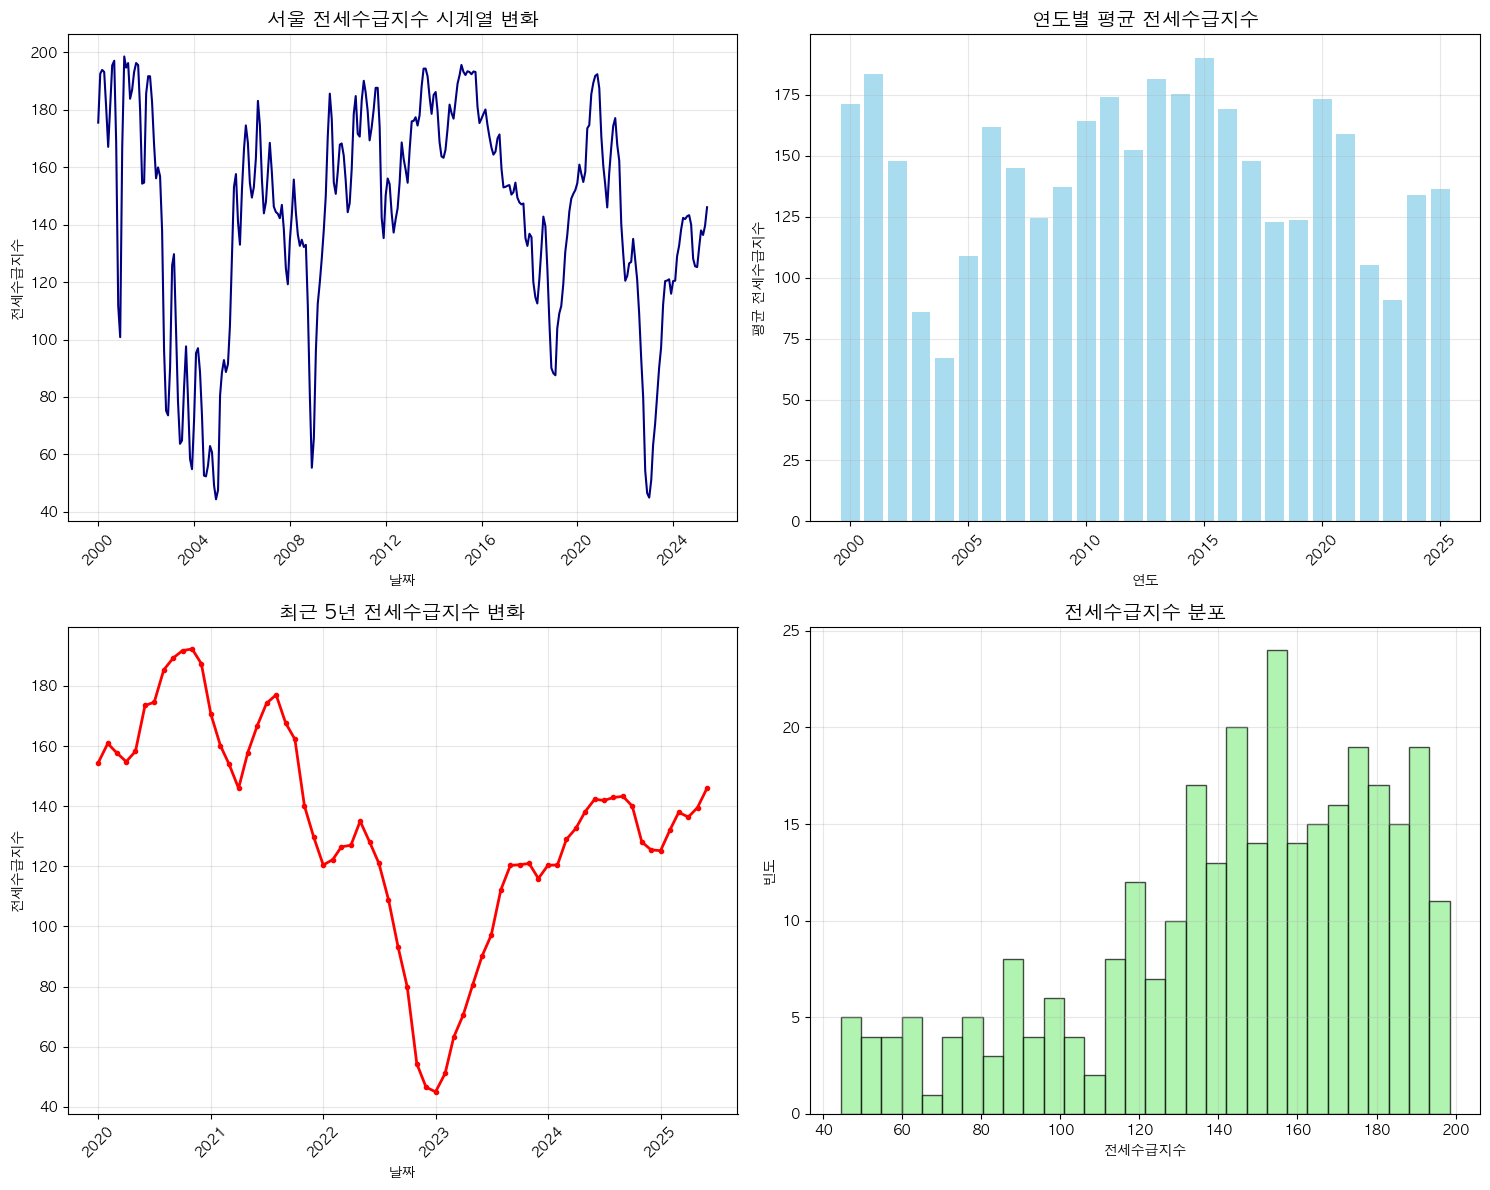

\n=== 주요 시점 분석 ===
최고점: 2001-02 - 198.49
최저점: 2004-12 - 44.39
최근 1년 평균: 134.55
전체 기간 평균: 143.71


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.font_manager as fm

# 한글 폰트 설정 (macOS)
try:
    # macOS에서 사용 가능한 한글 폰트 시도
    font_candidates = ['AppleGothic', 'Malgun Gothic', 'Arial Unicode MS', 'Noto Sans CJK KR']
    
    for font_name in font_candidates:
        try:
            plt.rcParams['font.family'] = font_name
            break
        except:
            continue
    else:
        # 폰트가 없으면 시스템 기본 폰트 사용
        plt.rcParams['font.family'] = 'sans-serif'
        
except Exception as e:
    print(f"폰트 설정 오류: {e}")
    plt.rcParams['font.family'] = 'sans-serif'

plt.rcParams['axes.unicode_minus'] = False
print(f"현재 사용 중인 폰트: {plt.rcParams['font.family']}")

# 더 자세한 분석을 위한 추가 시각화

# 연도별 평균 전세수급지수
seoul_data = df[df["지역명"] == "서울"]
seoul_data['연도'] = seoul_data['날짜'].dt.year
yearly_avg = seoul_data.groupby('연도')['전세수급지수'].mean()

# 서브플롯으로 여러 그래프 한번에 보기
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. 시계열 그래프 (상세)
axes[0, 0].plot(seoul_data['날짜'], seoul_data['전세수급지수'], linewidth=1.5, color='navy')
axes[0, 0].set_title('서울 전세수급지수 시계열 변화', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('날짜')
axes[0, 0].set_ylabel('전세수급지수')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. 연도별 평균
axes[0, 1].bar(yearly_avg.index, yearly_avg.values, color='skyblue', alpha=0.7)
axes[0, 1].set_title('연도별 평균 전세수급지수', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('연도')
axes[0, 1].set_ylabel('평균 전세수급지수')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. 최근 5년 상세 보기
recent_data = seoul_data[seoul_data['연도'] >= 2020]
axes[1, 0].plot(recent_data['날짜'], recent_data['전세수급지수'], linewidth=2, color='red', marker='o', markersize=3)
axes[1, 0].set_title('최근 5년 전세수급지수 변화', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('날짜')
axes[1, 0].set_ylabel('전세수급지수')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. 히스토그램
axes[1, 1].hist(seoul_data['전세수급지수'], bins=30, color='lightgreen', alpha=0.7, edgecolor='black')
axes[1, 1].set_title('전세수급지수 분포', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('전세수급지수')
axes[1, 1].set_ylabel('빈도')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 주요 시점 분석
print("\\n=== 주요 시점 분석 ===")
print(f"최고점: {seoul_data.loc[seoul_data['전세수급지수'].idxmax(), '날짜'].strftime('%Y-%m')} - {seoul_data['전세수급지수'].max():.2f}")
print(f"최저점: {seoul_data.loc[seoul_data['전세수급지수'].idxmin(), '날짜'].strftime('%Y-%m')} - {seoul_data['전세수급지수'].min():.2f}")
print(f"최근 1년 평균: {seoul_data[seoul_data['연도'] >= 2024]['전세수급지수'].mean():.2f}")
print(f"전체 기간 평균: {seoul_data['전세수급지수'].mean():.2f}")

In [13]:
params = {
    "월간주간구분코드": "01",
    "매물종별구분": "01",
    "매매전세코드": "02",
    "지역코드": "11",
    # "기간": "1",
}
df = api.get_price_index(**params)
df

,월간주간구분,매물종별구분,거래구분,지역코드,지역명,날짜,가격지수
0,월간,아파트,전세,1100000000,서울,1986-01-01,7.755721
1,월간,아파트,전세,1100000000,서울,1986-02-01,8.083758
2,월간,아파트,전세,1100000000,서울,1986-03-01,8.364932
3,월간,아파트,전세,1100000000,서울,1986-04-01,8.552382
4,월간,아파트,전세,1100000000,서울,1986-05-01,8.622675
...,...,...,...,...,...,...,...
12319,월간,아파트,전세,1174000000,강동구,2025-02-01,90.198984
12320,월간,아파트,전세,1174000000,강동구,2025-03-01,90.461245
12321,월간,아파트,전세,1174000000,강동구,2025-04-01,91.168056
12322,월간,아파트,전세,1174000000,강동구,2025-05-01,91.554405


서울 전체 데이터: 474 개
서울 구별 데이터: 11850 개
구별 지역: ['종로구' '서초구' '관악구' '동작구' '중구' '영등포구' '금천구' '구로구' '강동구' '용산구' '강남구' '강서구'
 '성동구' '마포구' '서대문구' '은평구' '광진구' '노원구' '도봉구' '동대문구' '강북구' '성북구' '양천구' '송파구'
 '중랑구']


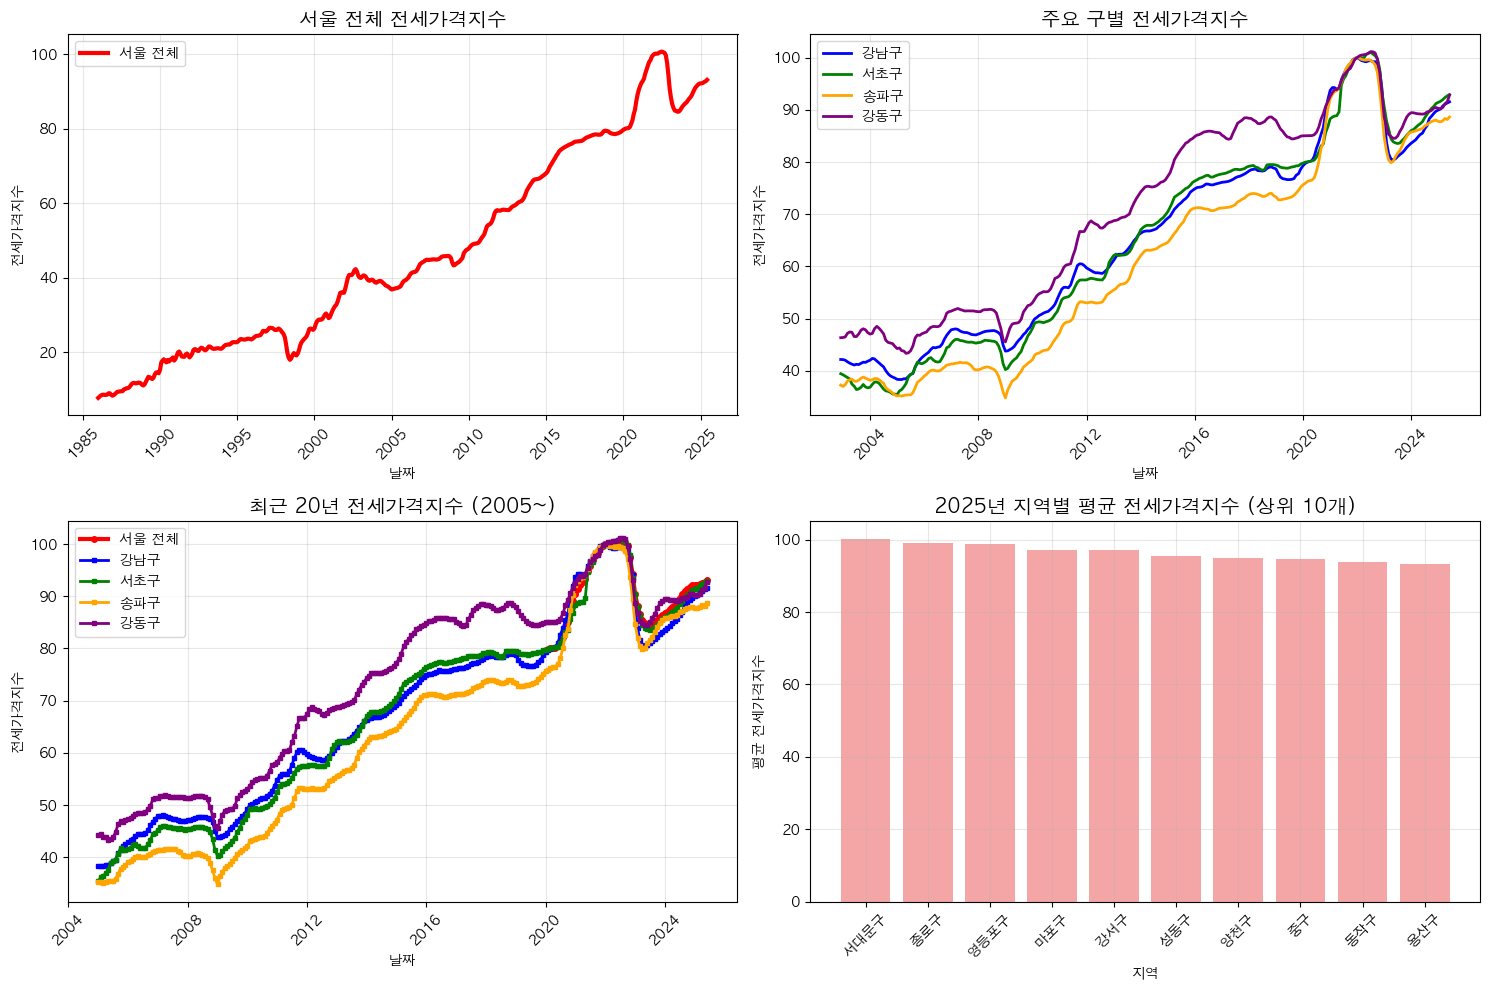

In [18]:


# 데이터 준비
price_data = df.copy()
price_data['날짜'] = pd.to_datetime(price_data['날짜'])
price_data = price_data.sort_values('날짜')

# 지역별 데이터 분리
seoul_total = price_data[price_data['지역명'] == '서울']
seoul_districts = price_data[price_data['지역명'] != '서울']

print(f"서울 전체 데이터: {len(seoul_total)} 개")
print(f"서울 구별 데이터: {len(seoul_districts)} 개")
print(f"구별 지역: {seoul_districts['지역명'].unique()}")

# 1. 서울 전체 vs 주요 구별 비교
plt.figure(figsize=(15, 10))

# 서울 전체 데이터
plt.subplot(2, 2, 1)
plt.plot(seoul_total['날짜'], seoul_total['가격지수'], linewidth=3, color='red', label='서울 전체')
plt.title('서울 전체 전세가격지수', fontsize=14, fontweight='bold')
plt.xlabel('날짜')
plt.ylabel('전세가격지수')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.legend()

# 주요 구별 데이터 (강남, 서초, 송파, 강동구)
plt.subplot(2, 2, 2)
major_districts = ['강남구', '서초구', '송파구', '강동구']
colors = ['blue', 'green', 'orange', 'purple']

for i, district in enumerate(major_districts):
    district_data = seoul_districts[seoul_districts['지역명'] == district]
    if len(district_data) > 0:
        plt.plot(district_data['날짜'], district_data['가격지수'], 
                linewidth=2, color=colors[i], label=district)

plt.title('주요 구별 전세가격지수', fontsize=14, fontweight='bold')
plt.xlabel('날짜')
plt.ylabel('전세가격지수')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.legend()

# 최근 5년 데이터 (2020년 이후)
plt.subplot(2, 2, 3)
recent_seoul = seoul_total[seoul_total['날짜'] >= '2020-01-01']
plt.plot(recent_seoul['날짜'], recent_seoul['가격지수'], 
         linewidth=3, color='red', marker='o', markersize=4, label='서울 전체')

for i, district in enumerate(major_districts):
    district_data = seoul_districts[
        (seoul_districts['지역명'] == district) & 
        (seoul_districts['날짜'] >= '2005-01-01')
    ]
    if len(district_data) > 0:
        plt.plot(district_data['날짜'], district_data['가격지수'], 
                linewidth=2, color=colors[i], marker='s', markersize=3, label=district)

plt.title('최근 20년 전세가격지수 (2005~)', fontsize=14, fontweight='bold')
plt.xlabel('날짜')
plt.ylabel('전세가격지수')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.legend()

# 2025년 최신 데이터 비교
plt.subplot(2, 2, 4)
latest_data = price_data[price_data['날짜'] >= '2025-01-01']
latest_by_region = latest_data.groupby('지역명')['가격지수'].mean().sort_values(ascending=False)

# 상위 10개 지역만 표시
top_regions = latest_by_region.head(10)
plt.bar(range(len(top_regions)), top_regions.values, color='lightcoral', alpha=0.7)
plt.title('2025년 지역별 평균 전세가격지수 (상위 10개)', fontsize=14, fontweight='bold')
plt.xlabel('지역')
plt.ylabel('평균 전세가격지수')
plt.xticks(range(len(top_regions)), top_regions.index, rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


/var/folders/dn/4bm4cvd531x1j7rd69rfnr3m0000gn/T/ipykernel_94799/1331661234.py:85: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot(box_data, labels=box_labels)


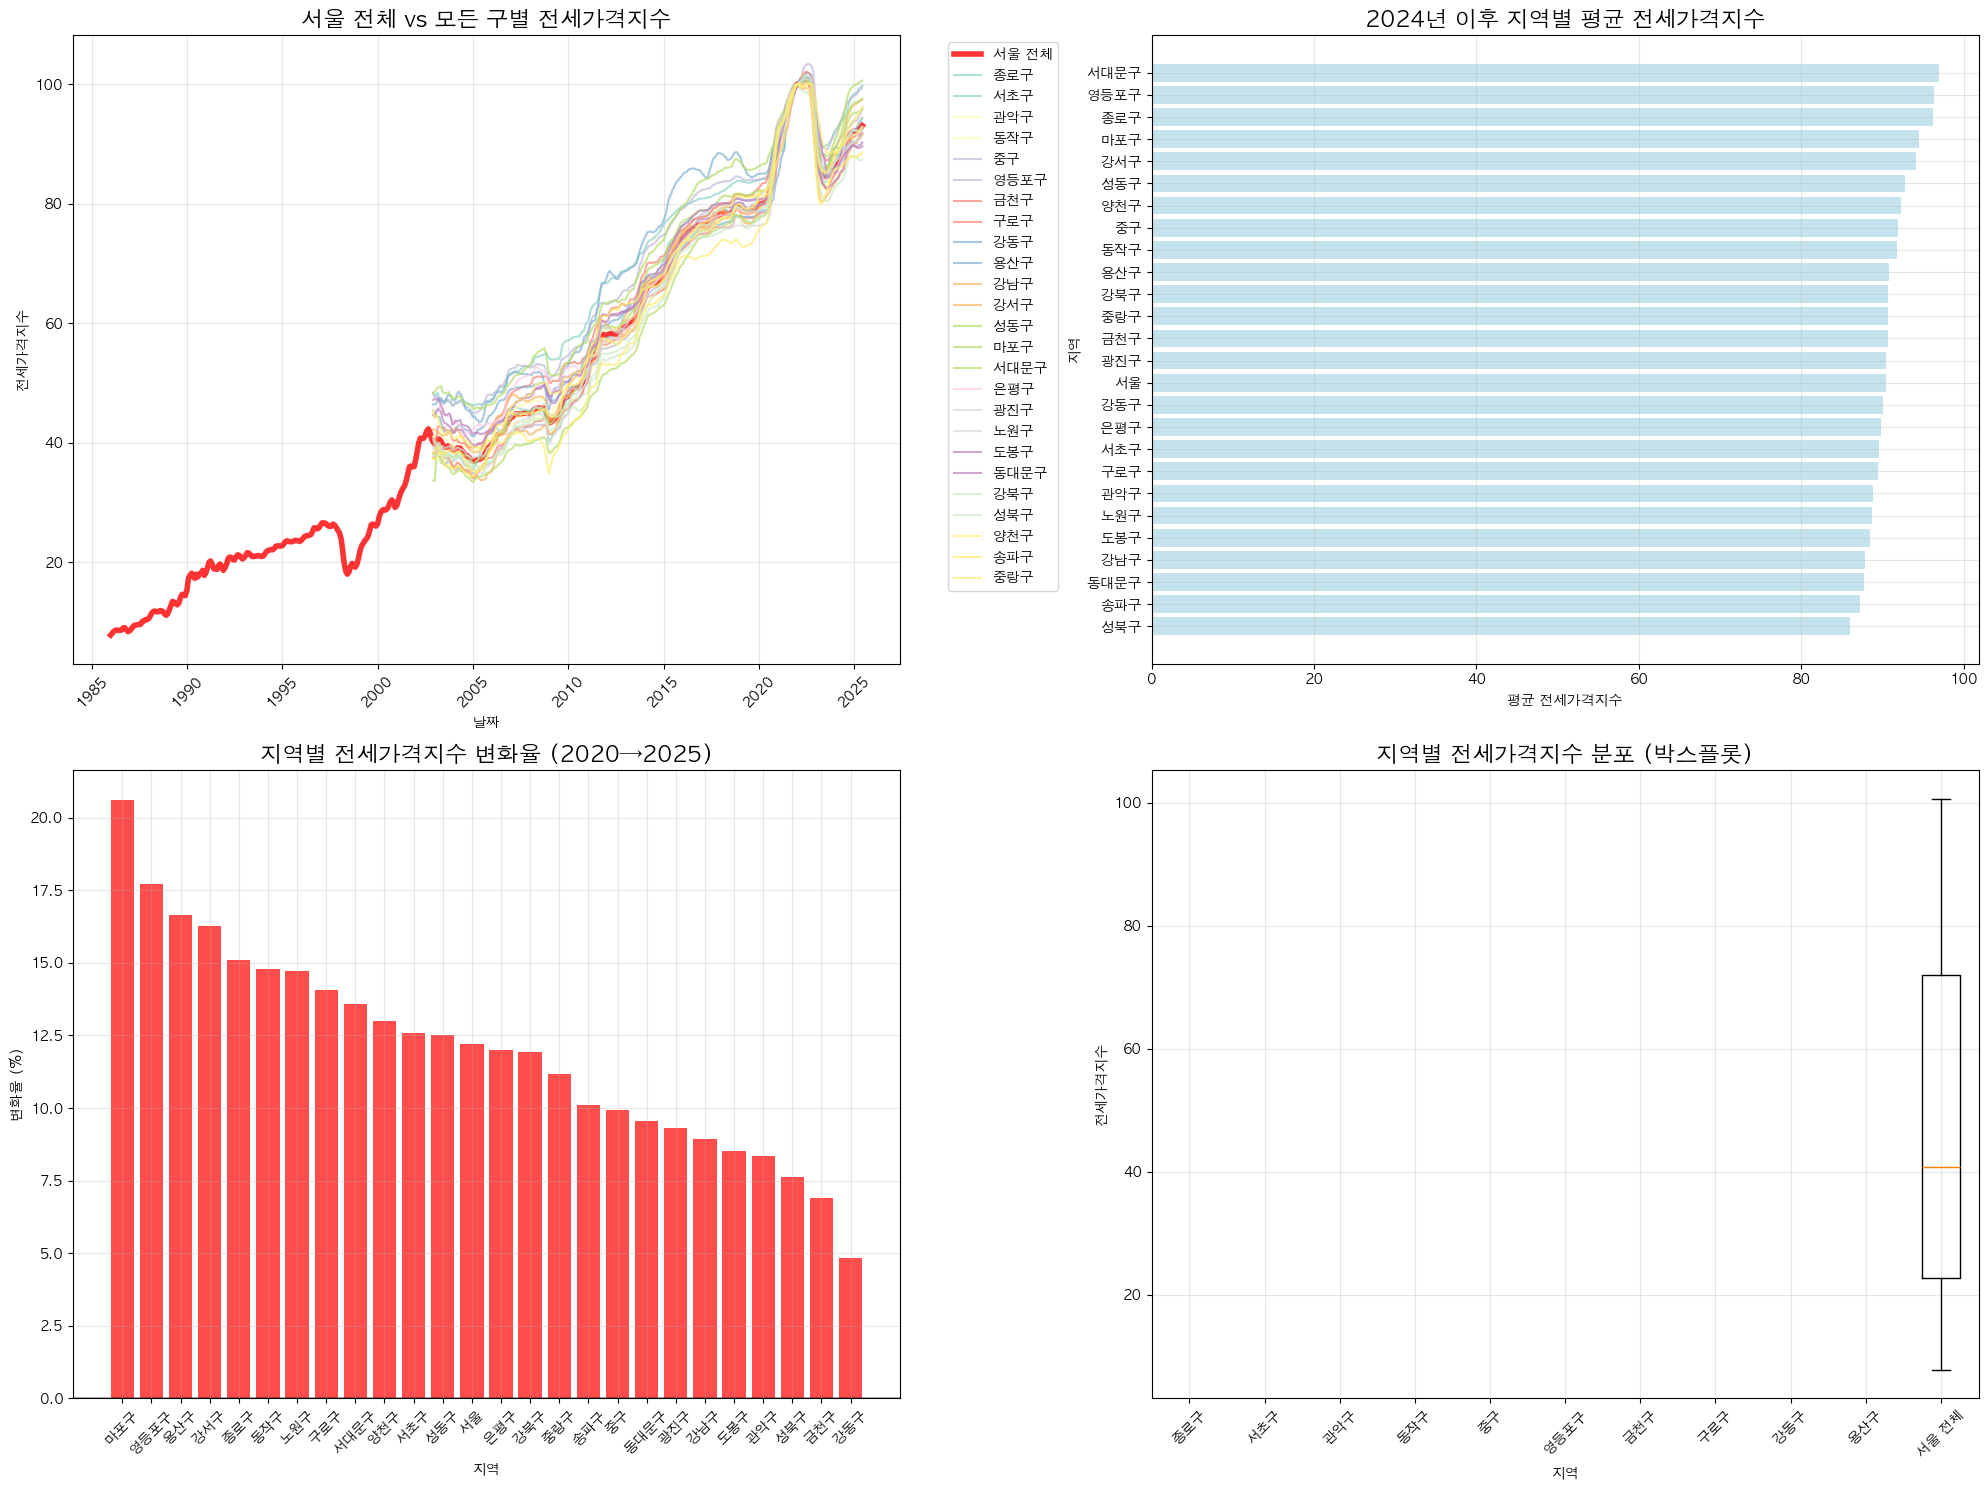

\n=== 지역별 전세가격지수 통계 요약 ===
\n1. 최신 데이터 (2025년 상반기) 평균:
  강서구: 94.11
  마포구: 94.53
  종로구: 96.28
  영등포구: 96.34
  서대문구: 97.00
\n2. 가격지수 변화율 (2020→2025) 상위 5개 지역:
  마포구: +20.6%
  영등포구: +17.7%
  용산구: +16.6%
  강서구: +16.3%
  종로구: +15.1%
\n3. 가격지수 변화율 (2020→2025) 하위 5개 지역:
  도봉구: +8.5%
  관악구: +8.3%
  성북구: +7.6%
  금천구: +6.9%
  강동구: +4.8%


In [16]:
# 모든 구별 전세가격지수 종합 분석
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 한글 폰트 설정
try:
    font_candidates = ['AppleGothic', 'Malgun Gothic', 'Arial Unicode MS', 'Noto Sans CJK KR']
    for font_name in font_candidates:
        try:
            plt.rcParams['font.family'] = font_name
            break
        except:
            continue
    else:
        plt.rcParams['font.family'] = 'sans-serif'
except:
    plt.rcParams['font.family'] = 'sans-serif'

plt.rcParams['axes.unicode_minus'] = False

# 모든 구별 데이터 한 번에 보기
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# 1. 모든 구별 시계열 (서울 전체 제외)
axes[0, 0].plot(seoul_total['날짜'], seoul_total['가격지수'], linewidth=4, color='red', label='서울 전체', alpha=0.8)

# 각 구별 데이터를 서로 다른 색상으로 표시
districts = seoul_districts['지역명'].unique()
colors = plt.cm.Set3(np.linspace(0, 1, len(districts)))

for i, district in enumerate(districts):
    district_data = seoul_districts[seoul_districts['지역명'] == district]
    axes[0, 0].plot(district_data['날짜'], district_data['가격지수'], 
                    linewidth=1.5, color=colors[i], label=district, alpha=0.7)

axes[0, 0].set_title('서울 전체 vs 모든 구별 전세가격지수', fontsize=16, fontweight='bold')
axes[0, 0].set_xlabel('날짜')
axes[0, 0].set_ylabel('전세가격지수')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 2. 최신 데이터 (2024년 이후) 지역별 평균
recent_avg = price_data[price_data['날짜'] >= '2024-01-01'].groupby('지역명')['가격지수'].mean().sort_values(ascending=True)
axes[0, 1].barh(range(len(recent_avg)), recent_avg.values, color='lightblue', alpha=0.7)
axes[0, 1].set_title('2024년 이후 지역별 평균 전세가격지수', fontsize=16, fontweight='bold')
axes[0, 1].set_xlabel('평균 전세가격지수')
axes[0, 1].set_ylabel('지역')
axes[0, 1].set_yticks(range(len(recent_avg)))
axes[0, 1].set_yticklabels(recent_avg.index)
axes[0, 1].grid(True, alpha=0.3)

# 3. 지역별 가격지수 변화율 (2020년 기준)
base_year_data = price_data[price_data['날짜'].dt.year == 2020].groupby('지역명')['가격지수'].mean()
latest_year_data = price_data[price_data['날짜'].dt.year == 2025].groupby('지역명')['가격지수'].mean()

# 변화율 계산 (2020년 대비 2025년)
change_rate = ((latest_year_data - base_year_data) / base_year_data * 100).sort_values(ascending=False)
change_rate = change_rate.dropna()

axes[1, 0].bar(range(len(change_rate)), change_rate.values, 
               color=['red' if x > 0 else 'blue' for x in change_rate.values], alpha=0.7)
axes[1, 0].set_title('지역별 전세가격지수 변화율 (2020→2025)', fontsize=16, fontweight='bold')
axes[1, 0].set_xlabel('지역')
axes[1, 0].set_ylabel('변화율 (%)')
axes[1, 0].set_xticks(range(len(change_rate)))
axes[1, 0].set_xticklabels(change_rate.index, rotation=45)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].axhline(y=0, color='black', linestyle='-', alpha=0.3)

# 4. 지역별 가격지수 박스플롯 (분포 비교)
box_data = []
box_labels = []
for region in districts[:10]:  # 상위 10개 구만 표시
    region_data = seoul_districts[seoul_districts['지역명'] == region]['가격지수'].values
    if len(region_data) > 0:
        box_data.append(region_data)
        box_labels.append(region)

# 서울 전체 데이터도 추가
box_data.append(seoul_total['가격지수'].values)
box_labels.append('서울 전체')

axes[1, 1].boxplot(box_data, labels=box_labels)
axes[1, 1].set_title('지역별 전세가격지수 분포 (박스플롯)', fontsize=16, fontweight='bold')
axes[1, 1].set_xlabel('지역')
axes[1, 1].set_ylabel('전세가격지수')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 통계 요약
print("\\n=== 지역별 전세가격지수 통계 요약 ===")
print("\\n1. 최신 데이터 (2025년 상반기) 평균:")
for region, avg in recent_avg.tail(5).items():
    print(f"  {region}: {avg:.2f}")

print("\\n2. 가격지수 변화율 (2020→2025) 상위 5개 지역:")
for region, rate in change_rate.head(5).items():
    print(f"  {region}: {rate:+.1f}%")

print("\\n3. 가격지수 변화율 (2020→2025) 하위 5개 지역:")
for region, rate in change_rate.tail(5).items():
    print(f"  {region}: {rate:+.1f}%")


In [24]:
params = {
    "매물종별구분": "01",
    "매매전세코드": "02",
    # "기간": "1",
}
avg_jense_price_df = api.get_average_price(**params)
avg_jense_price_df[avg_jense_price_df["지역명"] == "서울"]


,매물종별구분,매매전세코드,지역코드,지역명,날짜,평균가격
1,아파트,전세,1100000000,서울,2011-06-01,24901.918427
25,아파트,전세,1100000000,서울,2011-07-01,25171.369034
49,아파트,전세,1100000000,서울,2011-08-01,25614.920119
73,아파트,전세,1100000000,서울,2011-09-01,26117.389692
97,아파트,전세,1100000000,서울,2011-10-01,26355.255418
...,...,...,...,...,...,...
3937,아파트,전세,1100000000,서울,2025-02-01,63342.088359
3961,아파트,전세,1100000000,서울,2025-03-01,63512.954457
3985,아파트,전세,1100000000,서울,2025-04-01,64143.596536
4009,아파트,전세,1100000000,서울,2025-05-01,64281.233493


In [25]:
# 전세 평균 가격 데이터 시각화
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 한글 폰트 설정
try:
    font_candidates = ['AppleGothic', 'Malgun Gothic', 'Arial Unicode MS', 'Noto Sans CJK KR']
    for font_name in font_candidates:
        try:
            plt.rcParams['font.family'] = font_name
            break
        except:
            continue
    else:
        plt.rcParams['font.family'] = 'sans-serif'
except:
    plt.rcParams['font.family'] = 'sans-serif'

plt.rcParams['axes.unicode_minus'] = False

# 데이터 확인
print("전세 평균 가격 데이터 구조:")
print(avg_jense_price_df.columns.tolist())
print(f"\\n총 데이터 수: {len(avg_jense_price_df)}")
print(f"지역 목록: {avg_jense_price_df['지역명'].unique()}")
print(f"\\n데이터 샘플:")
print(avg_jense_price_df.head())

# 데이터 준비
avg_price_data = avg_jense_price_df.copy()
avg_price_data['날짜'] = pd.to_datetime(avg_price_data['날짜'])
avg_price_data = avg_price_data.sort_values('날짜')

# 서울 전체와 구별 데이터 분리
seoul_avg_total = avg_price_data[avg_price_data['지역명'] == '서울']
seoul_avg_districts = avg_price_data[avg_price_data['지역명'] != '서울']

print(f"\\n서울 전체 평균가격 데이터: {len(seoul_avg_total)} 개")
print(f"서울 구별 평균가격 데이터: {len(seoul_avg_districts)} 개")


전세 평균 가격 데이터 구조:
['매물종별구분', '매매전세코드', '지역코드', '지역명', '날짜', '평균가격']
\n총 데이터 수: 4056
지역 목록: ['전국' '서울' '강북14개구' '강남11개구' '수도권' '6개광역시' '5개광역시' '기타지방' '부산' '대구' '인천'
 '광주' '대전' '울산' '세종' '경기' '충북' '충남' '전남' '경북' '경남' '제주' '강원' '전북']
\n데이터 샘플:
  매물종별구분 매매전세코드        지역코드     지역명         날짜          평균가격
0    아파트     전세  0000000000      전국 2011-06-01  14140.118347
1    아파트     전세  1100000000      서울 2011-06-01  24901.918427
2    아파트     전세      1A0000  강북14개구 2011-06-01  20239.567048
3    아파트     전세      1B0000  강남11개구 2011-06-01  28730.967766
4    아파트     전세      1T0000     수도권 2011-06-01  17870.669505
\n서울 전체 평균가격 데이터: 169 개
서울 구별 평균가격 데이터: 3887 개


가격 관련 컬럼: ['평균가격']
사용할 가격 컬럼: 평균가격


/var/folders/dn/4bm4cvd531x1j7rd69rfnr3m0000gn/T/ipykernel_94799/1603148914.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{int(y/10000):,}' for y in y_vals])


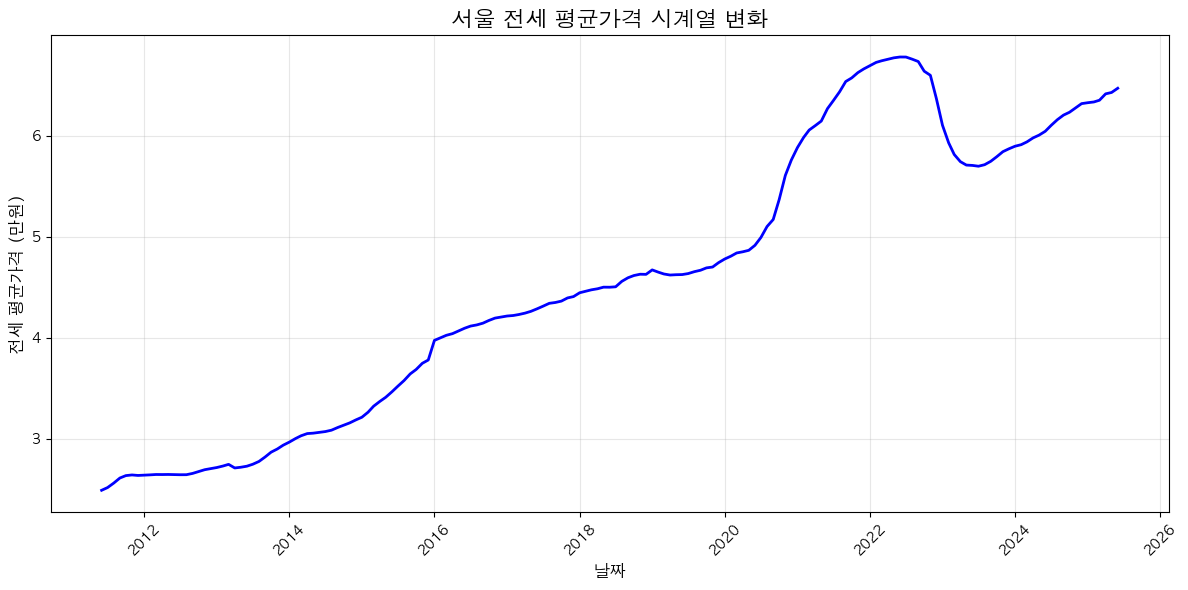

\n전세 평균가격 기본 통계:
최소값: 24,902원
최대값: 67,792원
평균값: 45,649원
표준편차: 13,724원
최신 데이터: 64,700원


In [26]:
# 전세 평균 가격 시각화 (기본 그래프)
import matplotlib.pyplot as plt
import pandas as pd

# 한글 폰트 설정
try:
    font_candidates = ['AppleGothic', 'Malgun Gothic', 'Arial Unicode MS', 'Noto Sans CJK KR']
    for font_name in font_candidates:
        try:
            plt.rcParams['font.family'] = font_name
            break
        except:
            continue
    else:
        plt.rcParams['font.family'] = 'sans-serif'
except:
    plt.rcParams['font.family'] = 'sans-serif'

plt.rcParams['axes.unicode_minus'] = False

# 평균가격 컬럼 확인 (가능한 컬럼명들)
price_columns = [col for col in avg_price_data.columns if '평균' in col or '가격' in col or 'price' in col.lower()]
print(f"가격 관련 컬럼: {price_columns}")

# 적절한 가격 컬럼 선택
if price_columns:
    price_col = price_columns[0]  # 첫 번째 가격 컬럼 사용
else:
    # 가격 컬럼이 명확하지 않으면 모든 숫자 컬럼 확인
    numeric_cols = avg_price_data.select_dtypes(include=[np.number]).columns.tolist()
    price_col = [col for col in numeric_cols if col not in ['지역코드']][0] if numeric_cols else None

print(f"사용할 가격 컬럼: {price_col}")

if price_col:
    # 기본 시계열 그래프
    plt.figure(figsize=(12, 6))
    plt.plot(seoul_avg_total['날짜'], seoul_avg_total[price_col], linewidth=2, color='blue')
    plt.title('서울 전세 평균가격 시계열 변화', fontsize=16, fontweight='bold')
    plt.xlabel('날짜', fontsize=12)
    plt.ylabel('전세 평균가격 (만원)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    
    # 가격을 만원 단위로 표시
    y_vals = plt.gca().get_yticks()
    plt.gca().set_yticklabels([f'{int(y/10000):,}' for y in y_vals])
    
    plt.tight_layout()
    plt.show()
    
    # 기본 통계 정보
    print(f"\\n전세 평균가격 기본 통계:")
    print(f"최소값: {seoul_avg_total[price_col].min():,.0f}원")
    print(f"최대값: {seoul_avg_total[price_col].max():,.0f}원")
    print(f"평균값: {seoul_avg_total[price_col].mean():,.0f}원")
    print(f"표준편차: {seoul_avg_total[price_col].std():,.0f}원")
    print(f"최신 데이터: {seoul_avg_total[price_col].iloc[-1]:,.0f}원")
    
else:
    print("가격 컬럼을 찾을 수 없습니다. 데이터 구조를 확인해주세요.")


/var/folders/dn/4bm4cvd531x1j7rd69rfnr3m0000gn/T/ipykernel_94799/3571334440.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_yticklabels([f'{int(y/10000):,}' for y in y_vals])
/var/folders/dn/4bm4cvd531x1j7rd69rfnr3m0000gn/T/ipykernel_94799/3571334440.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_yticklabels([f'{int(y/10000):,}' for y in y_vals])
/var/folders/dn/4bm4cvd531x1j7rd69rfnr3m0000gn/T/ipykernel_94799/3571334440.py:92: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels([f'{int(x/10000):,}' for x in x_vals])


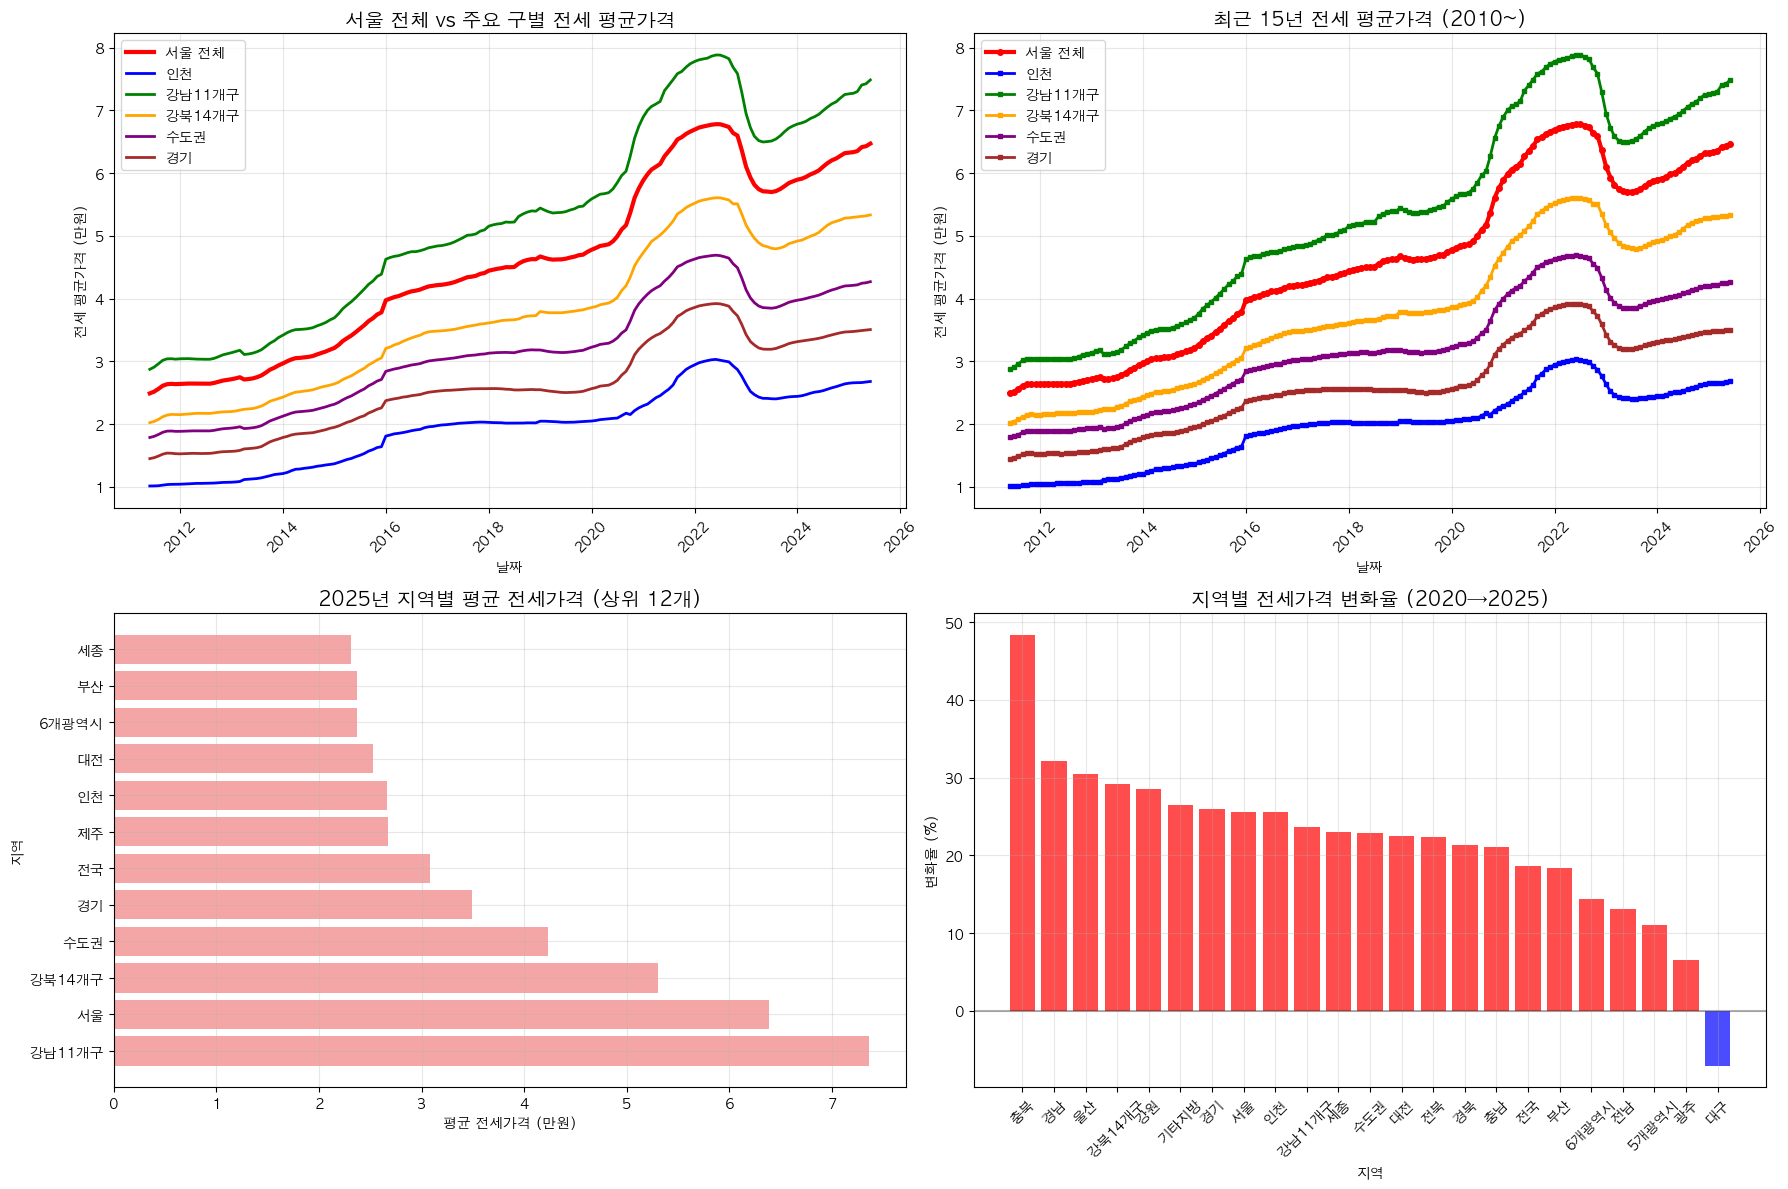

\n=== 전세 평균가격 통계 요약 ===
\n1. 2025년 지역별 평균 전세가격 (상위 5개):
  강남11개구: 73,579원 (7.4만원)
  서울: 63,875원 (6.4만원)
  강북14개구: 53,086원 (5.3만원)
  수도권: 42,340원 (4.2만원)
  경기: 34,878원 (3.5만원)
\n2. 가격 변화율 (2020→2025) 상위 5개 지역:
  충북: +48.4%
  경남: +32.2%
  울산: +30.5%
  강북14개구: +29.2%
  강원: +28.6%
\n3. 가격 변화율 (2020→2025) 하위 5개 지역:
  6개광역시: +14.4%
  전남: +13.0%
  5개광역시: +11.1%
  광주: +6.5%
  대구: -7.0%
\n4. 서울 전체 전세가격 트렌드:
  최근 1년 평균: 61,883원 (6.2만원)
  전체 기간 변화율: +159.8%


In [31]:
# 전세 평균 가격 상세 분석 시각화
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 한글 폰트 설정
try:
    font_candidates = ['AppleGothic', 'Malgun Gothic', 'Arial Unicode MS', 'Noto Sans CJK KR']
    for font_name in font_candidates:
        try:
            plt.rcParams['font.family'] = font_name
            break
        except:
            continue
    else:
        plt.rcParams['font.family'] = 'sans-serif'
except:
    plt.rcParams['font.family'] = 'sans-serif'

plt.rcParams['axes.unicode_minus'] = False

if price_col:
    # 서브플롯으로 다양한 분석
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    
    # 1. 서울 전체 vs 주요 구별 평균가격 비교
    axes[0, 0].plot(seoul_avg_total['날짜'], seoul_avg_total[price_col], 
                    linewidth=3, color='red', label='서울 전체')
    
    # 주요 구별 (상위 가격대)
    major_districts = ['인천', '강남11개구', '강북14개구', '수도권', '경기']
    colors = ['blue', 'green', 'orange', 'purple', 'brown']
    
    for i, district in enumerate(major_districts):
        district_data = seoul_avg_districts[seoul_avg_districts['지역명'] == district]
        if len(district_data) > 0:
            axes[0, 0].plot(district_data['날짜'], district_data[price_col], 
                           linewidth=2, color=colors[i], label=district)
    
    axes[0, 0].set_title('서울 전체 vs 주요 구별 전세 평균가격', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('날짜')
    axes[0, 0].set_ylabel('전세 평균가격 (만원)')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].tick_params(axis='x', rotation=45)
    axes[0, 0].legend()
    
    # Y축 라벨을 만원 단위로 표시
    y_vals = axes[0, 0].get_yticks()
    axes[0, 0].set_yticklabels([f'{int(y/10000):,}' for y in y_vals])
    
    # 2. 최근 5년 데이터 (2020년 이후)
    recent_seoul = seoul_avg_total[seoul_avg_total['날짜'] >= '2010-01-01']
    axes[0, 1].plot(recent_seoul['날짜'], recent_seoul[price_col], 
                    linewidth=3, color='red', marker='o', markersize=4, label='서울 전체')
    
    for i, district in enumerate(major_districts):
        district_data = seoul_avg_districts[
            (seoul_avg_districts['지역명'] == district) & 
            (seoul_avg_districts['날짜'] >= '2010-01-01')
        ]
        if len(district_data) > 0:
            axes[0, 1].plot(district_data['날짜'], district_data[price_col], 
                           linewidth=2, color=colors[i], marker='s', markersize=3, label=district)
    
    axes[0, 1].set_title('최근 15년 전세 평균가격 (2010~)', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('날짜')
    axes[0, 1].set_ylabel('전세 평균가격 (만원)')
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].tick_params(axis='x', rotation=45)
    axes[0, 1].legend()
    
    # Y축 라벨을 만원 단위로 표시
    y_vals = axes[0, 1].get_yticks()
    axes[0, 1].set_yticklabels([f'{int(y/10000):,}' for y in y_vals])
    
    # 3. 2025년 지역별 평균가격 비교
    latest_data = avg_price_data[avg_price_data['날짜'] >= '2025-01-01']
    if len(latest_data) > 0:
        latest_by_region = latest_data.groupby('지역명')[price_col].mean().sort_values(ascending=False)
        top_regions = latest_by_region.head(12)
        
        axes[1, 0].barh(range(len(top_regions)), top_regions.values, color='lightcoral', alpha=0.7)
        axes[1, 0].set_title('2025년 지역별 평균 전세가격 (상위 12개)', fontsize=14, fontweight='bold')
        axes[1, 0].set_xlabel('평균 전세가격 (만원)')
        axes[1, 0].set_ylabel('지역')
        axes[1, 0].set_yticks(range(len(top_regions)))
        axes[1, 0].set_yticklabels(top_regions.index)
        axes[1, 0].grid(True, alpha=0.3)
        
        # X축 라벨을 만원 단위로 표시
        x_vals = axes[1, 0].get_xticks()
        axes[1, 0].set_xticklabels([f'{int(x/10000):,}' for x in x_vals])
    
    # 4. 전세가격 변화율 (2020년 기준)
    base_year_data = avg_price_data[avg_price_data['날짜'].dt.year == 2020].groupby('지역명')[price_col].mean()
    latest_year_data = avg_price_data[avg_price_data['날짜'].dt.year == 2025].groupby('지역명')[price_col].mean()
    
    # 변화율 계산
    change_rate = ((latest_year_data - base_year_data) / base_year_data * 100).sort_values(ascending=False)
    change_rate = change_rate.dropna()
    
    if len(change_rate) > 0:
        axes[1, 1].bar(range(len(change_rate)), change_rate.values, 
                      color=['red' if x > 0 else 'blue' for x in change_rate.values], alpha=0.7)
        axes[1, 1].set_title('지역별 전세가격 변화율 (2020→2025)', fontsize=14, fontweight='bold')
        axes[1, 1].set_xlabel('지역')
        axes[1, 1].set_ylabel('변화율 (%)')
        axes[1, 1].set_xticks(range(len(change_rate)))
        axes[1, 1].set_xticklabels(change_rate.index, rotation=45)
        axes[1, 1].grid(True, alpha=0.3)
        axes[1, 1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 통계 요약
    print("\\n=== 전세 평균가격 통계 요약 ===")
    if len(latest_data) > 0:
        print("\\n1. 2025년 지역별 평균 전세가격 (상위 5개):")
        for region, price in latest_by_region.head(5).items():
            print(f"  {region}: {price:,.0f}원 ({price/10000:,.1f}만원)")
    
    if len(change_rate) > 0:
        print("\\n2. 가격 변화율 (2020→2025) 상위 5개 지역:")
        for region, rate in change_rate.head(5).items():
            print(f"  {region}: {rate:+.1f}%")
        
        print("\\n3. 가격 변화율 (2020→2025) 하위 5개 지역:")
        for region, rate in change_rate.tail(5).items():
            print(f"  {region}: {rate:+.1f}%")
    
    # 서울 전체 가격 트렌드
    print(f"\\n4. 서울 전체 전세가격 트렌드:")
    if len(seoul_avg_total) > 0:
        recent_avg = seoul_avg_total[seoul_avg_total['날짜'] >= '2024-01-01'][price_col].mean()
        print(f"  최근 1년 평균: {recent_avg:,.0f}원 ({recent_avg/10000:,.1f}만원)")
        
        start_price = seoul_avg_total[price_col].iloc[0]
        end_price = seoul_avg_total[price_col].iloc[-1]
        total_change = ((end_price - start_price) / start_price * 100)
        print(f"  전체 기간 변화율: {total_change:+.1f}%")
        
else:
    print("가격 컬럼을 찾을 수 없어 시각화를 수행할 수 없습니다.")


In [37]:
params = {
    "메뉴코드": "01",
    "매매전세코드": "01",
    # "기간": 1,
}
quintile_df = api.get_average_price_by_quintile(**params)
quintile_df[quintile_df["지역명"] == "서울"]


,구분,매매전세코드,지역코드,지역명,날짜,5분위,4분위,3분위,2분위,1분위,5분위배율
1,아파트 평균가격,매매,1100000000,서울,2008-12-01,93389.000000,56784.000000,43994.874630,33928.118950,23333.356830,4.002395
14,아파트 평균가격,매매,1100000000,서울,2009-01-01,92513.000000,55768.000000,43280.725080,33736.896850,23263.729760,3.976689
27,아파트 평균가격,매매,1100000000,서울,2009-02-01,92762.000000,56297.000000,43235.861610,33593.849990,22737.579730,4.079667
40,아파트 평균가격,매매,1100000000,서울,2009-03-01,92247.000000,56206.000000,43059.696900,33493.840920,22736.550310,4.057198
53,아파트 평균가격,매매,1100000000,서울,2009-04-01,93328.000000,57105.000000,43370.020210,33226.882930,22674.948040,4.115917
...,...,...,...,...,...,...,...,...,...,...,...
2523,아파트 평균가격,매매,1100000000,서울,2025-02-01,275168.949700,140133.852785,99777.207172,75562.255767,48997.521036,5.615977
2536,아파트 평균가격,매매,1100000000,서울,2025-03-01,282912.404395,141081.295379,100203.545904,75655.680647,48976.431103,5.776501
2549,아파트 평균가격,매매,1100000000,서울,2025-04-01,295042.628829,144007.844658,101155.357728,75924.345453,49004.421744,6.020735
2562,아파트 평균가격,매매,1100000000,서울,2025-05-01,300941.822195,145169.852019,101587.759429,76101.950405,49044.353827,6.136116


In [38]:
# 5분위 배율 데이터 시각화 (정확한 컬럼명 사용)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 한글 폰트 설정
try:
    font_candidates = ['AppleGothic', 'Malgun Gothic', 'Arial Unicode MS', 'Noto Sans CJK KR']
    for font_name in font_candidates:
        try:
            plt.rcParams['font.family'] = font_name
            break
        except:
            continue
    else:
        plt.rcParams['font.family'] = 'sans-serif'
except:
    plt.rcParams['font.family'] = 'sans-serif'

plt.rcParams['axes.unicode_minus'] = False

# 데이터 확인
print("5분위 배율 데이터 구조:")
print(quintile_df.columns.tolist())
print(f"\\n총 데이터 수: {len(quintile_df)}")
print(f"지역 목록: {quintile_df['지역명'].unique()}")
print(f"\\n데이터 샘플:")
print(quintile_df.head())

# 데이터 준비
quintile_data = quintile_df.copy()
quintile_data['날짜'] = pd.to_datetime(quintile_data['날짜'])
quintile_data = quintile_data.sort_values('날짜')

# 5분위배율 컬럼 사용
quintile_col = '5분위배율'
print(f"\\n5분위 배율 컬럼: {quintile_col}")

# 분위별 가격 컬럼들
quintile_price_cols = ['5분위', '4분위', '3분위', '2분위', '1분위']
print(f"분위별 가격 컬럼: {quintile_price_cols}")

# 서울 전체와 구별 데이터 분리
seoul_quintile_total = quintile_data[quintile_data['지역명'] == '서울']
seoul_quintile_districts = quintile_data[quintile_data['지역명'] != '서울']

print(f"\\n서울 전체 5분위 배율 데이터: {len(seoul_quintile_total)} 개")
print(f"서울 구별 5분위 배율 데이터: {len(seoul_quintile_districts)} 개")

# 분위별 가격 범위 확인
if len(seoul_quintile_total) > 0:
    print(f"\\n서울 전체 분위별 가격 범위 (최신 데이터):")
    latest_data = seoul_quintile_total.iloc[-1]
    for col in quintile_price_cols:
        if col in latest_data:
            price = latest_data[col]
            print(f"  {col}: {price:,.0f}만원")
    print(f"  5분위배율: {latest_data[quintile_col]:.2f} (상위 20%가 하위 20%보다 {latest_data[quintile_col]:.1f}배 비쌈)")


5분위 배율 데이터 구조:
['구분', '매매전세코드', '지역코드', '지역명', '날짜', '5분위', '4분위', '3분위', '2분위', '1분위', '5분위배율']
\n총 데이터 수: 2587
지역 목록: ['전국' '서울' '수도권' '6개광역시' '5개광역시' '기타지방' '부산' '대구' '인천' '광주' '대전' '울산' '경기']
\n데이터 샘플:
         구분 매매전세코드        지역코드    지역명         날짜      5분위      4분위  \
0  아파트 평균가격     매매  0000000000     전국 2008-12-01  53771.0  28672.0   
1  아파트 평균가격     매매  1100000000     서울 2008-12-01  93389.0  56784.0   
2  아파트 평균가격     매매      1T0000    수도권 2008-12-01      NaN      NaN   
3  아파트 평균가격     매매      2A0000  6개광역시 2008-12-01      NaN      NaN   
4  아파트 평균가격     매매      2B0000  5개광역시 2008-12-01      NaN      NaN   

           3분위          2분위          1분위     5분위배율  
0  18550.43915  11866.63563   6625.13901  8.116232  
1  43994.87463  33928.11895  23333.35683  4.002395  
2          NaN          NaN          NaN       NaN  
3          NaN          NaN          NaN       NaN  
4          NaN          NaN          NaN       NaN  
\n5분위 배율 컬럼: 5분위배율
분위별 가격 컬럼: ['5분위', '4분위', '3분위', '2분

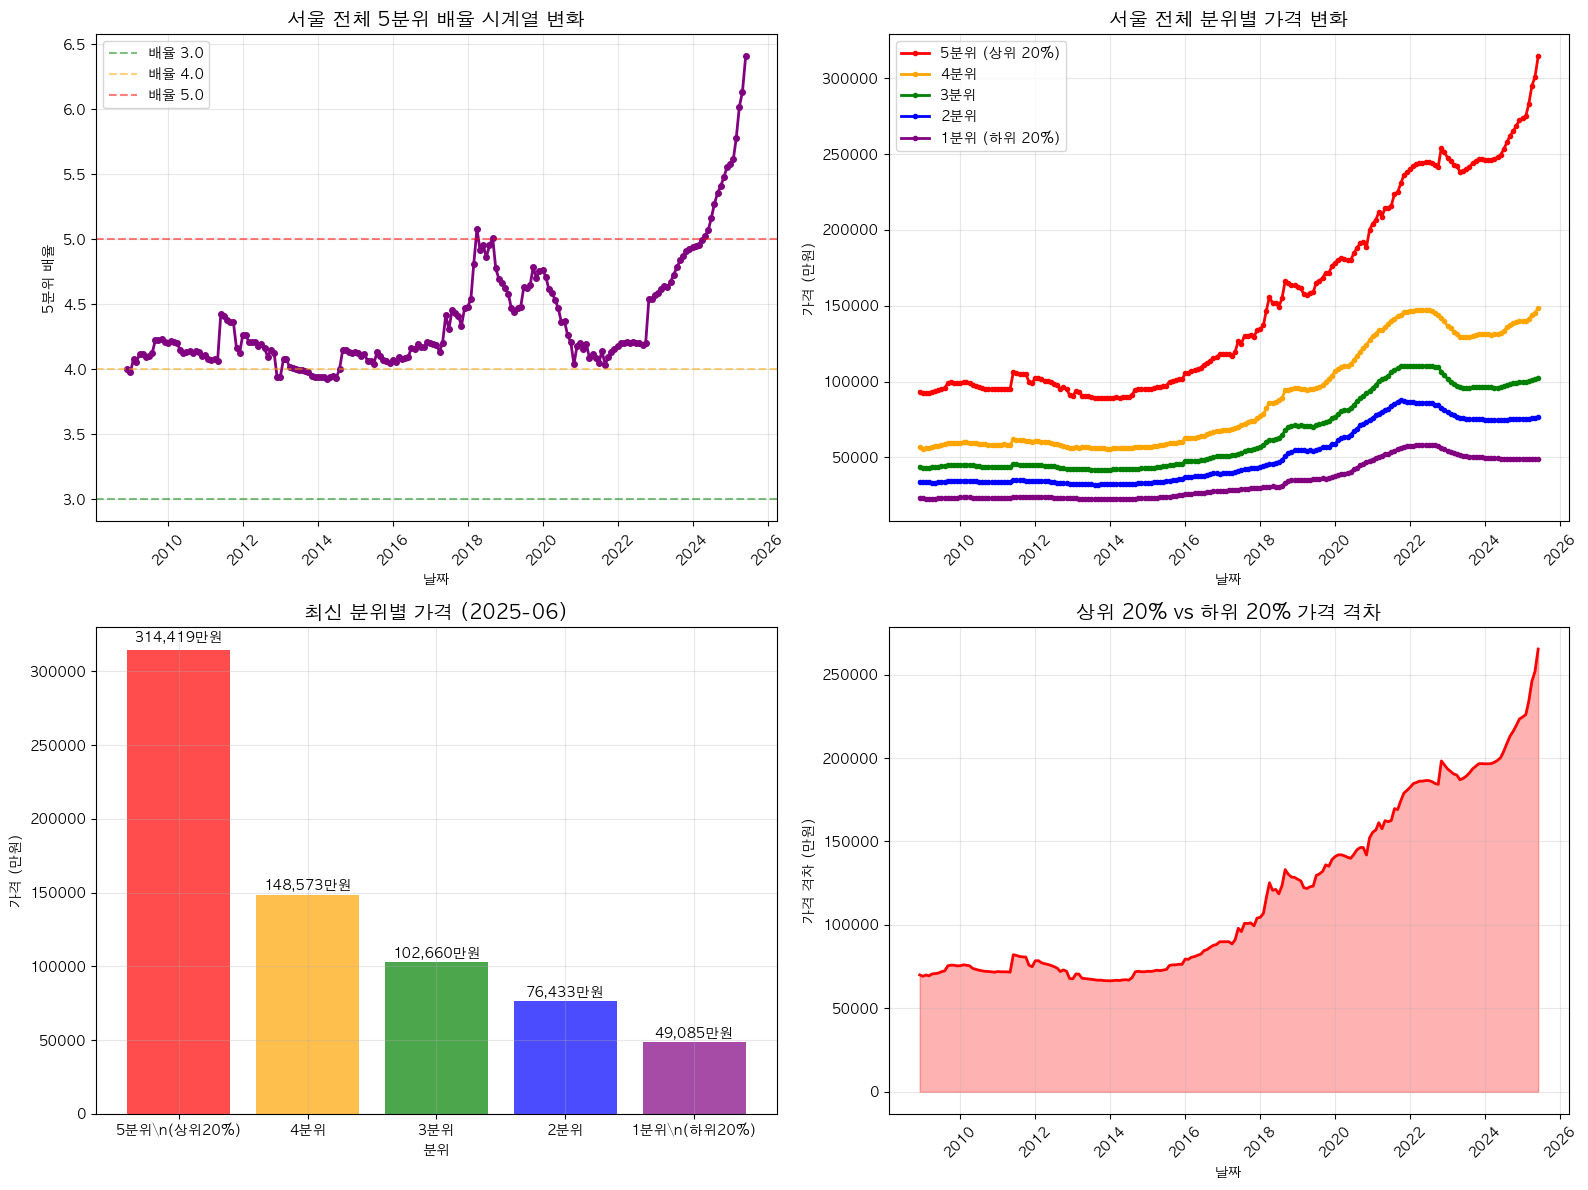

\n=== 서울 전체 5분위 배율 기본 통계 ===
최소값: 3.93
최대값: 6.41
평균값: 4.38
표준편차: 0.44
최신 데이터: 6.41
\n📊 최신 5분위 배율 해석:
서울의 상위 20% 주택이 하위 20% 주택보다 6.4배 비쌉니다.
→ 매우 큰 가격 격차 (부동산 시장 불평등 심화)
\n💰 최신 가격 격차:
상위 20% 평균가격: 314,419만원
하위 20% 평균가격: 49,085만원
절대 격차: 265,334만원


In [39]:
# 5분위 배율과 분위별 가격 시각화
import matplotlib.pyplot as plt
import pandas as pd

# 한글 폰트 설정
try:
    font_candidates = ['AppleGothic', 'Malgun Gothic', 'Arial Unicode MS', 'Noto Sans CJK KR']
    for font_name in font_candidates:
        try:
            plt.rcParams['font.family'] = font_name
            break
        except:
            continue
    else:
        plt.rcParams['font.family'] = 'sans-serif'
except:
    plt.rcParams['font.family'] = 'sans-serif'

plt.rcParams['axes.unicode_minus'] = False

# 서브플롯으로 다양한 시각화
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. 5분위 배율 시계열
axes[0, 0].plot(seoul_quintile_total['날짜'], seoul_quintile_total['5분위배율'], 
                linewidth=2, color='purple', marker='o', markersize=4)
axes[0, 0].set_title('서울 전체 5분위 배율 시계열 변화', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('날짜')
axes[0, 0].set_ylabel('5분위 배율')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# 기준선 추가
axes[0, 0].axhline(y=3.0, color='green', linestyle='--', alpha=0.5, label='배율 3.0')
axes[0, 0].axhline(y=4.0, color='orange', linestyle='--', alpha=0.5, label='배율 4.0')
axes[0, 0].axhline(y=5.0, color='red', linestyle='--', alpha=0.5, label='배율 5.0')
axes[0, 0].legend()

# 2. 분위별 가격 시계열 (서울 전체)
colors = ['red', 'orange', 'green', 'blue', 'purple']
quintile_labels = ['5분위 (상위 20%)', '4분위', '3분위', '2분위', '1분위 (하위 20%)']

for i, (col, label) in enumerate(zip(quintile_price_cols, quintile_labels)):
    axes[0, 1].plot(seoul_quintile_total['날짜'], seoul_quintile_total[col], 
                    linewidth=2, color=colors[i], label=label, marker='o', markersize=3)

axes[0, 1].set_title('서울 전체 분위별 가격 변화', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('날짜')
axes[0, 1].set_ylabel('가격 (만원)')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].legend()

# 3. 최신 분위별 가격 막대그래프
latest_data = seoul_quintile_total.iloc[-1]
latest_prices = [latest_data[col] for col in quintile_price_cols]

bars = axes[1, 0].bar(range(len(quintile_price_cols)), latest_prices, 
                      color=colors, alpha=0.7)
axes[1, 0].set_title(f'최신 분위별 가격 ({latest_data["날짜"].strftime("%Y-%m")})', 
                     fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('분위')
axes[1, 0].set_ylabel('가격 (만원)')
axes[1, 0].set_xticks(range(len(quintile_price_cols)))
axes[1, 0].set_xticklabels(['5분위\\n(상위20%)', '4분위', '3분위', '2분위', '1분위\\n(하위20%)'])
axes[1, 0].grid(True, alpha=0.3)

# 막대 위에 가격 표시
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                    f'{height:,.0f}만원', ha='center', va='bottom', fontsize=10)

# 4. 가격 격차 시각화 (5분위 vs 1분위)
price_gap = seoul_quintile_total['5분위'] - seoul_quintile_total['1분위']
axes[1, 1].fill_between(seoul_quintile_total['날짜'], price_gap, alpha=0.3, color='red', label='가격 격차')
axes[1, 1].plot(seoul_quintile_total['날짜'], price_gap, linewidth=2, color='red')
axes[1, 1].set_title('상위 20% vs 하위 20% 가격 격차', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('날짜')
axes[1, 1].set_ylabel('가격 격차 (만원)')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 기본 통계 정보
print(f"\\n=== 서울 전체 5분위 배율 기본 통계 ===")
print(f"최소값: {seoul_quintile_total['5분위배율'].min():.2f}")
print(f"최대값: {seoul_quintile_total['5분위배율'].max():.2f}")
print(f"평균값: {seoul_quintile_total['5분위배율'].mean():.2f}")
print(f"표준편차: {seoul_quintile_total['5분위배율'].std():.2f}")
print(f"최신 데이터: {seoul_quintile_total['5분위배율'].iloc[-1]:.2f}")

# 5분위 배율 해석
latest_ratio = seoul_quintile_total['5분위배율'].iloc[-1]
print(f"\\n📊 최신 5분위 배율 해석:")
print(f"서울의 상위 20% 주택이 하위 20% 주택보다 {latest_ratio:.1f}배 비쌉니다.")

if latest_ratio >= 6.0:
    print("→ 매우 큰 가격 격차 (부동산 시장 불평등 심화)")
elif latest_ratio >= 4.0:
    print("→ 큰 가격 격차 (다양한 가격대 주택 존재)")
elif latest_ratio >= 3.0:
    print("→ 보통 가격 격차 (적당한 시장 분화)")
else:
    print("→ 작은 가격 격차 (비교적 균등한 시장)")

# 최신 가격 격차 정보
latest_gap = latest_data['5분위'] - latest_data['1분위']
print(f"\\n💰 최신 가격 격차:")
print(f"상위 20% 평균가격: {latest_data['5분위']:,.0f}만원")
print(f"하위 20% 평균가격: {latest_data['1분위']:,.0f}만원")
print(f"절대 격차: {latest_gap:,.0f}만원")


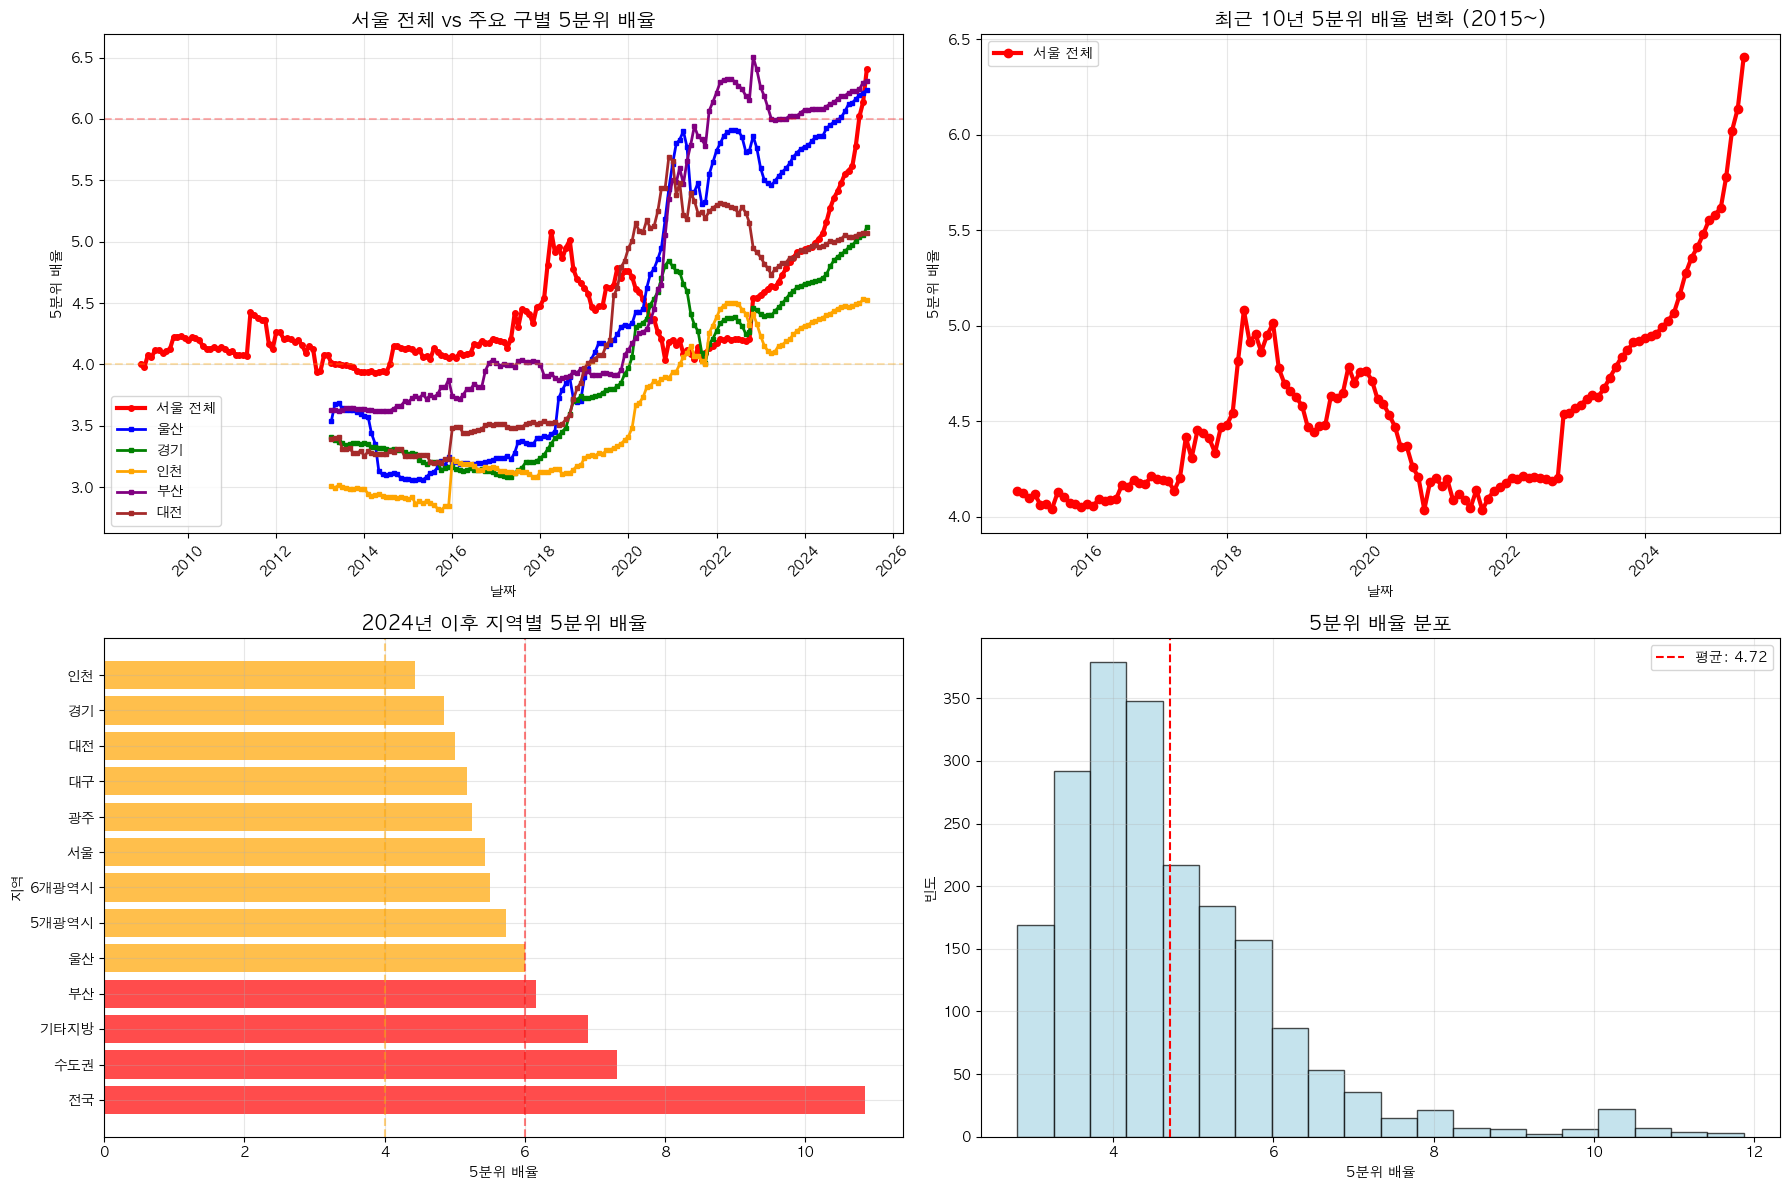

\n=== 5분위 배율 통계 요약 ===
전체 평균 5분위 배율: 4.72
전체 최대 5분위 배율: 11.87
전체 최소 5분위 배율: 2.81
\n1. 최신 지역별 5분위 배율 (상위 5개):
  전국: 10.85
  수도권: 7.32
  기타지방: 6.90
  부산: 6.16
  울산: 6.00
\n2. 최신 지역별 5분위 배율 (하위 5개):
  광주: 5.24
  대구: 5.17
  대전: 5.01
  경기: 4.85
  인천: 4.43


In [43]:
# 구별 5분위 배율 상세 분석
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 한글 폰트 설정
try:
    font_candidates = ['AppleGothic', 'Malgun Gothic', 'Arial Unicode MS', 'Noto Sans CJK KR']
    for font_name in font_candidates:
        try:
            plt.rcParams['font.family'] = font_name
            break
        except:
            continue
    else:
        plt.rcParams['font.family'] = 'sans-serif'
except:
    plt.rcParams['font.family'] = 'sans-serif'

plt.rcParams['axes.unicode_minus'] = False

# 서브플롯으로 구별 분석
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. 서울 전체 vs 주요 구별 5분위 배율 비교
axes[0, 0].plot(seoul_quintile_total['날짜'], seoul_quintile_total['5분위배율'], 
                linewidth=3, color='red', label='서울 전체', marker='o', markersize=4)

# 주요 구별 5분위 배율
# ['전국' '서울' '수도권' '6개광역시' '5개광역시' '기타지방' '부산' '대구' '인천' '광주' '대전' '울산' '경기']
major_districts = ['울산', '경기', '인천', '부산', '대전']
colors = ['blue', 'green', 'orange', 'purple', 'brown']

for i, district in enumerate(major_districts):
    district_data = seoul_quintile_districts[seoul_quintile_districts['지역명'] == district]
    if len(district_data) > 0:
        axes[0, 0].plot(district_data['날짜'], district_data['5분위배율'], 
                       linewidth=2, color=colors[i], label=district, marker='s', markersize=3)

axes[0, 0].set_title('서울 전체 vs 주요 구별 5분위 배율', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('날짜')
axes[0, 0].set_ylabel('5분위 배율')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].legend()
axes[0, 0].axhline(y=4.0, color='orange', linestyle='--', alpha=0.3)
axes[0, 0].axhline(y=6.0, color='red', linestyle='--', alpha=0.3)

# 2. 최근 데이터 (2015년 이후)
recent_seoul = seoul_quintile_total[seoul_quintile_total['날짜'] >= '2015-01-01']
axes[0, 1].plot(recent_seoul['날짜'], recent_seoul['5분위배율'], 
                linewidth=3, color='red', marker='o', markersize=6, label='서울 전체')

axes[0, 1].set_title('최근 10년 5분위 배율 변화 (2015~)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('날짜')
axes[0, 1].set_ylabel('5분위 배율')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].legend()

# 3. 2025년 지역별 5분위 배율 비교
latest_data = quintile_data[quintile_data['날짜'] >= '2024-01-01']
if len(latest_data) > 0:
    latest_by_region = latest_data.groupby('지역명')['5분위배율'].mean().sort_values(ascending=False)
    colors_by_ratio = ['red' if x >= 6.0 else 'orange' if x >= 4.0 else 'green' for x in latest_by_region.values]
    
    axes[1, 0].barh(range(len(latest_by_region)), latest_by_region.values, 
                   color=colors_by_ratio, alpha=0.7)
    axes[1, 0].set_title('2024년 이후 지역별 5분위 배율', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('5분위 배율')
    axes[1, 0].set_ylabel('지역')
    axes[1, 0].set_yticks(range(len(latest_by_region)))
    axes[1, 0].set_yticklabels(latest_by_region.index)
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].axvline(x=4.0, color='orange', linestyle='--', alpha=0.5)
    axes[1, 0].axvline(x=6.0, color='red', linestyle='--', alpha=0.5)

# 4. 가격 격차 히스토그램
all_ratios = quintile_data['5분위배율'].dropna()
axes[1, 1].hist(all_ratios, bins=20, color='lightblue', alpha=0.7, edgecolor='black')
axes[1, 1].set_title('5분위 배율 분포', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('5분위 배율')
axes[1, 1].set_ylabel('빈도')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].axvline(x=all_ratios.mean(), color='red', linestyle='--', label=f'평균: {all_ratios.mean():.2f}')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# 통계 요약
print("\\n=== 5분위 배율 통계 요약 ===")
print(f"전체 평균 5분위 배율: {all_ratios.mean():.2f}")
print(f"전체 최대 5분위 배율: {all_ratios.max():.2f}")
print(f"전체 최소 5분위 배율: {all_ratios.min():.2f}")

if len(latest_data) > 0:
    print("\\n1. 최신 지역별 5분위 배율 (상위 5개):")
    for region, ratio in latest_by_region.head(5).items():
        print(f"  {region}: {ratio:.2f}")
    
    print("\\n2. 최신 지역별 5분위 배율 (하위 5개):")
    for region, ratio in latest_by_region.tail(5).items():
        print(f"  {region}: {ratio:.2f}")


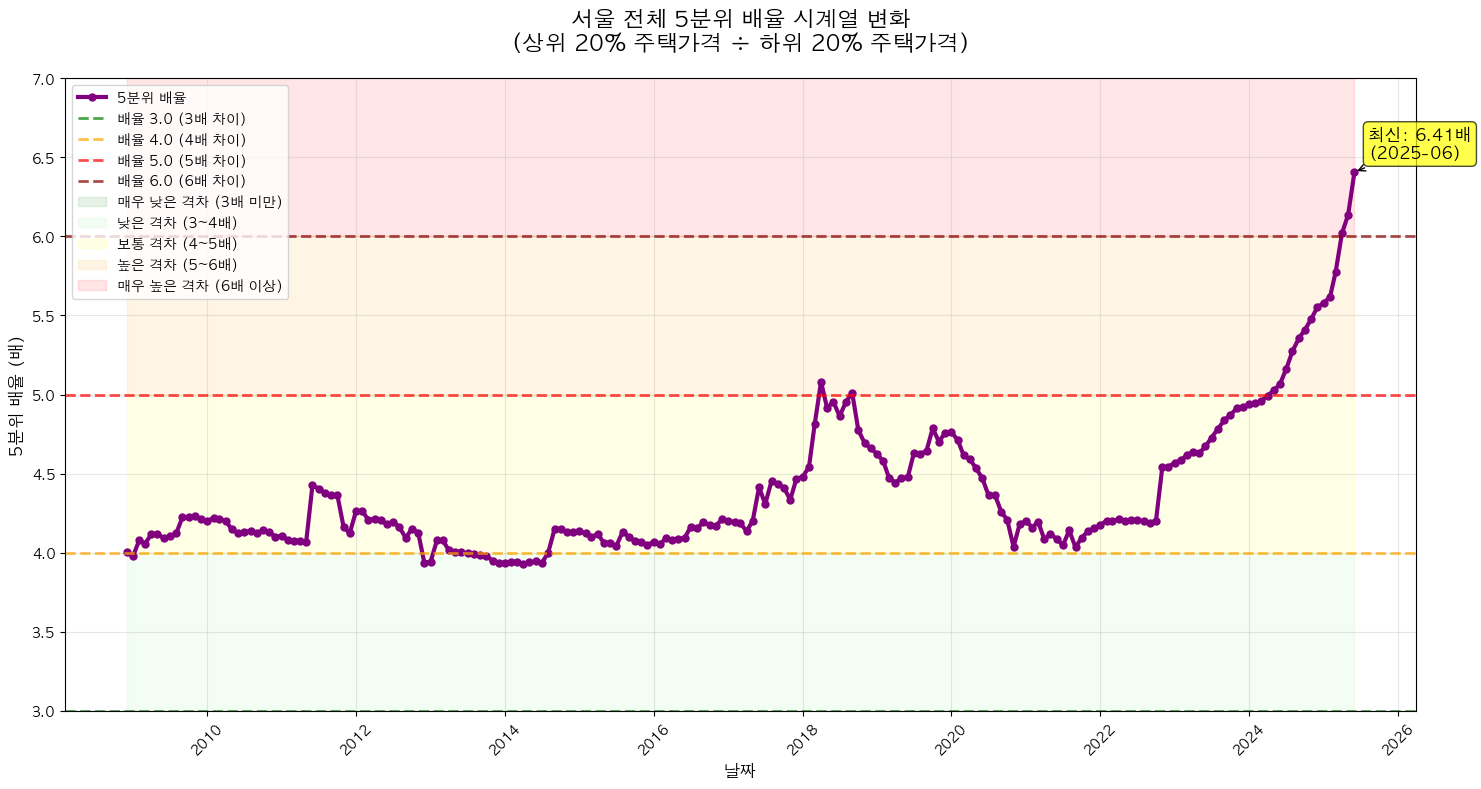

\n=== 5분위 배율 구간별 해석 ===
📊 5분위 배율 = 상위 20% 주택 평균가격 ÷ 하위 20% 주택 평균가격

🟢 3.0 미만: 매우 낮은 격차 (상대적으로 균등한 시장)
🟡 3.0~4.0: 낮은 격차 (비교적 균등한 시장)
🟠 4.0~5.0: 보통 격차 (일반적인 시장 분화)
🔴 5.0~6.0: 높은 격차 (시장 양극화 진행)
🔴 6.0 이상: 매우 높은 격차 (심각한 시장 불평등)

💡 현재 서울 상황: 6.41배
   → 상위 20% 주택: 314,419만원
   → 하위 20% 주택: 49,085만원
   → 절대 격차: 265,334만원
\n=== 시계열 변화 추세 ===
전체 기간 변화: +2.40배 (2008-12 → 2025-06)
최근 5년 변화: +1.64배 (2020년 이후)


In [41]:
# 5분위 배율 그래프 해석 개선
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 한글 폰트 설정
try:
    font_candidates = ['AppleGothic', 'Malgun Gothic', 'Arial Unicode MS', 'Noto Sans CJK KR']
    for font_name in font_candidates:
        try:
            plt.rcParams['font.family'] = font_name
            break
        except:
            continue
    else:
        plt.rcParams['font.family'] = 'sans-serif'
except:
    plt.rcParams['font.family'] = 'sans-serif'

plt.rcParams['axes.unicode_minus'] = False

# 큰 그래프로 5분위 배율 상세 분석
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

# 5분위 배율 그래프
line = ax.plot(seoul_quintile_total['날짜'], seoul_quintile_total['5분위배율'], 
               linewidth=3, color='purple', marker='o', markersize=5, label='5분위 배율')

# 기준선과 구간 설명
ax.axhline(y=3.0, color='green', linestyle='--', alpha=0.7, linewidth=2, label='배율 3.0 (3배 차이)')
ax.axhline(y=4.0, color='orange', linestyle='--', alpha=0.7, linewidth=2, label='배율 4.0 (4배 차이)')
ax.axhline(y=5.0, color='red', linestyle='--', alpha=0.7, linewidth=2, label='배율 5.0 (5배 차이)')
ax.axhline(y=6.0, color='darkred', linestyle='--', alpha=0.7, linewidth=2, label='배율 6.0 (6배 차이)')

# 구간별 색상 영역 표시
dates = seoul_quintile_total['날짜']
ratios = seoul_quintile_total['5분위배율']

# 3.0 미만 구간 (매우 낮은 격차)
ax.fill_between(dates, 0, 3.0, alpha=0.1, color='green', label='매우 낮은 격차 (3배 미만)')

# 3.0~4.0 구간 (낮은 격차)
ax.fill_between(dates, 3.0, 4.0, alpha=0.1, color='lightgreen', label='낮은 격차 (3~4배)')

# 4.0~5.0 구간 (보통 격차)
ax.fill_between(dates, 4.0, 5.0, alpha=0.1, color='yellow', label='보통 격차 (4~5배)')

# 5.0~6.0 구간 (높은 격차)
ax.fill_between(dates, 5.0, 6.0, alpha=0.1, color='orange', label='높은 격차 (5~6배)')

# 6.0 이상 구간 (매우 높은 격차)
ax.fill_between(dates, 6.0, 8.0, alpha=0.1, color='red', label='매우 높은 격차 (6배 이상)')

ax.set_title('서울 전체 5분위 배율 시계열 변화\n(상위 20% 주택가격 ÷ 하위 20% 주택가격)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('날짜', fontsize=12)
ax.set_ylabel('5분위 배율 (배)', fontsize=12)
ax.grid(True, alpha=0.3)
ax.tick_params(axis='x', rotation=45)
ax.legend(loc='upper left', fontsize=10)

# Y축 범위 설정
ax.set_ylim(3.0, 7.0)

# 최신 데이터 포인트 강조
latest_date = seoul_quintile_total['날짜'].iloc[-1]
latest_ratio = seoul_quintile_total['5분위배율'].iloc[-1]
ax.annotate(f'최신: {latest_ratio:.2f}배\n({latest_date.strftime("%Y-%m")})', 
            xy=(latest_date, latest_ratio), xytext=(10, 10),
            textcoords='offset points', fontsize=12, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.tight_layout()
plt.show()

# 구간별 해석
print("\\n=== 5분위 배율 구간별 해석 ===")
print("📊 5분위 배율 = 상위 20% 주택 평균가격 ÷ 하위 20% 주택 평균가격")
print()
print("🟢 3.0 미만: 매우 낮은 격차 (상대적으로 균등한 시장)")
print("🟡 3.0~4.0: 낮은 격차 (비교적 균등한 시장)")
print("🟠 4.0~5.0: 보통 격차 (일반적인 시장 분화)")
print("🔴 5.0~6.0: 높은 격차 (시장 양극화 진행)")
print("🔴 6.0 이상: 매우 높은 격차 (심각한 시장 불평등)")
print()
print(f"💡 현재 서울 상황: {latest_ratio:.2f}배")
print(f"   → 상위 20% 주택: {seoul_quintile_total['5분위'].iloc[-1]:,.0f}만원")
print(f"   → 하위 20% 주택: {seoul_quintile_total['1분위'].iloc[-1]:,.0f}만원")
print(f"   → 절대 격차: {seoul_quintile_total['5분위'].iloc[-1] - seoul_quintile_total['1분위'].iloc[-1]:,.0f}만원")

# 시계열 변화 추세 분석
print("\\n=== 시계열 변화 추세 ===")
ratio_change = latest_ratio - seoul_quintile_total['5분위배율'].iloc[0]
print(f"전체 기간 변화: {ratio_change:+.2f}배 ({seoul_quintile_total['날짜'].iloc[0].strftime('%Y-%m')} → {latest_date.strftime('%Y-%m')})")

# 최근 5년간 변화
recent_5y = seoul_quintile_total[seoul_quintile_total['날짜'] >= '2020-01-01']
if len(recent_5y) > 0:
    recent_change = latest_ratio - recent_5y['5분위배율'].iloc[0]
    print(f"최근 5년 변화: {recent_change:+.2f}배 (2020년 이후)")
